In [23]:
# imports
import panel as pn
import dash
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
import plotnine as p9
import os
import warnings
from scipy import linalg, optimize
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
production_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'joined_production_mean_data.csv')
production_df = pd.read_csv(production_path, index_col='Year')
production_df

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha)
Year,,,
2010,545752.0,1236288.2,4081.6
2011,613287.6,1319243.4,4469.2
2012,630098.8,1334580.6,4272.2
2013,610980.8,1328779.0,4156.4
2014,646788.8,1399964.0,4250.6
2015,682383.4,1479694.0,4272.2
2016,652293.8,1375332.6,4211.4
2017,751691.0,1624987.8,4311.2
2018,757511.4,1679538.6,4346.2


In [25]:
ivory_coast_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual Mean Temperature_Cote d'Ivoire_1901-2020_CIV.csv")
ivory_coast_temp = pd.read_csv(ivory_coast_temp_path)
ivory_coast_temp = ivory_coast_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Cote d'Ivoire"})
ivory_coast_temp = ivory_coast_temp.dropna()
ivory_coast_temp = ivory_coast_temp.set_index('Year')
ivory_coast_temp = pd.DataFrame(ivory_coast_temp, columns = ["Cote d'Ivoire"])
ivory_coast_temp = ivory_coast_temp.iloc[109:118]
ivory_coast_temp

,Cote d'Ivoire
Year,
2010.0,26.69
2011.0,26.49
2012.0,26.19
2013.0,26.46
2014.0,26.45
2015.0,26.66
2016.0,26.86
2017.0,26.79
2018.0,26.69


In [26]:
ghana_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature_1901-2020_Ghana.csv")
ghana_temp = pd.read_csv(ghana_temp_path)
ghana_temp = ghana_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Ghana"})
ghana_temp = ghana_temp.dropna()
ghana_temp = ghana_temp.set_index('Year')
ghana_temp = pd.DataFrame(ghana_temp, columns = ["Ghana"])
ghana_temp = ghana_temp.iloc[109:118]
ghana_temp

,Ghana
Year,
2010,28.10
2011,27.79
2012,27.55
2013,27.73
2014,27.85
2015,27.98
2016,28.23
2017,28.06
2018,27.98


In [27]:
nigeria_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature Data_1901-2020_Nigeria.csv")
nigeria_temp = pd.read_csv(nigeria_temp_path)
nigeria_temp = nigeria_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Nigeria"})
nigeria_temp = nigeria_temp.dropna()
nigeria_temp = nigeria_temp.set_index('Year')
nigeria_temp = pd.DataFrame(nigeria_temp, columns = ["Nigeria"])
nigeria_temp = nigeria_temp.iloc[109:118]
nigeria_temp

,Nigeria
Year,
2010.0,27.47
2011.0,27.1
2012.0,26.91
2013.0,27.05
2014.0,27.11
2015.0,26.91
2016.0,27.28
2017.0,26.88
2018.0,26.82


In [28]:
cameroon_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature_Data_1901-2020_Cameroon.csv")
cameroon_temp = pd.read_csv(cameroon_temp_path)
cameroon_temp = cameroon_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Cameroon"})
cameroon_temp = cameroon_temp.dropna()
cameroon_temp = cameroon_temp.set_index('Year')
cameroon_temp = pd.DataFrame(cameroon_temp, columns = ["Cameroon"])
cameroon_temp = cameroon_temp.iloc[109:118]
cameroon_temp

,Cameroon
Year,
2010.0,23.75
2011.0,23.37
2012.0,23.32
2013.0,23.48
2014.0,23.5
2015.0,23.46
2016.0,23.77
2017.0,23.46
2018.0,23.45


In [29]:
ecuador_temp_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', "Annual_Mean_Temperature_Data_1901_2020_Ecuador.csv")
ecuador_temp = pd.read_csv(ecuador_temp_path)
ecuador_temp = ecuador_temp.rename(columns= {'Variable:' : 'Year', 'Unnamed: 2' : "Ecuador"})
ecuador_temp = ecuador_temp.dropna()
ecuador_temp = ecuador_temp.set_index('Year')
ecuador_temp = pd.DataFrame(ecuador_temp, columns = ["Ecuador"])
ecuador_temp = ecuador_temp.iloc[109:118]
ecuador_temp

,Ecuador
Year,
2010.0,15.41
2011.0,15.15
2012.0,15.43
2013.0,15.01
2014.0,15.65
2015.0,16.24
2016.0,16.04
2017.0,15.84
2018.0,15.45


In [30]:
joined_temp = pd.concat([ghana_temp, ivory_coast_temp, nigeria_temp, cameroon_temp, ecuador_temp], axis='columns', join='inner')
joined_temp

,Ghana,Cote d'Ivoire,Nigeria,Cameroon,Ecuador
Year,,,,,
2010,28.10,26.69,27.47,23.75,15.41
2011,27.79,26.49,27.1,23.37,15.15
2012,27.55,26.19,26.91,23.32,15.43
2013,27.73,26.46,27.05,23.48,15.01
2014,27.85,26.45,27.11,23.5,15.65
2015,27.98,26.66,26.91,23.46,16.24
2016,28.23,26.86,27.28,23.77,16.04
2017,28.06,26.79,26.88,23.46,15.84
2018,27.98,26.69,26.82,23.45,15.45


In [31]:
joined_temp_mean = joined_temp.mean(axis=1)
joined_temp_mean = pd.DataFrame(joined_temp_mean)
joined_temp_mean = joined_temp_mean.rename(columns = {0 : 'Avg. Temp (C)'})
joined_temp_mean

,Avg. Temp (C)
Year,
2010,28.10
2011,27.79
2012,27.55
2013,27.73
2014,27.85
2015,27.98
2016,28.23
2017,28.06
2018,27.98


In [32]:
joined_temp_production_df = pd.concat([production_df, joined_temp_mean], axis='columns', join='inner')
joined_temp_production_df

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha),Avg. Temp (C)
Year,,,,
2010,545752.0,1236288.2,4081.6,28.10
2011,613287.6,1319243.4,4469.2,27.79
2012,630098.8,1334580.6,4272.2,27.55
2013,610980.8,1328779.0,4156.4,27.73
2014,646788.8,1399964.0,4250.6,27.85
2015,682383.4,1479694.0,4272.2,27.98
2016,652293.8,1375332.6,4211.4,28.23
2017,751691.0,1624987.8,4311.2,28.06
2018,757511.4,1679538.6,4346.2,27.98


In [33]:
production_temp_correlation = joined_temp_production_df.corr()
production_temp_correlation

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha),Avg. Temp (C)
Crops (tonnes),1.000000,0.980336,0.485710,0.214610
Area Harvested (ha),0.980336,1.000000,0.426079,0.260180
Yield (hg/ha),0.485710,0.426079,1.000000,-0.244056
Avg. Temp (C),0.214610,0.260180,-0.244056,1.000000


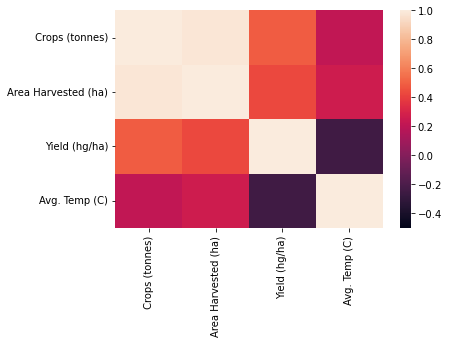

In [34]:
import seaborn as sns
temp_production_correlation_heatmap = sns.heatmap(production_temp_correlation, vmin=-0.5, vmax=1)

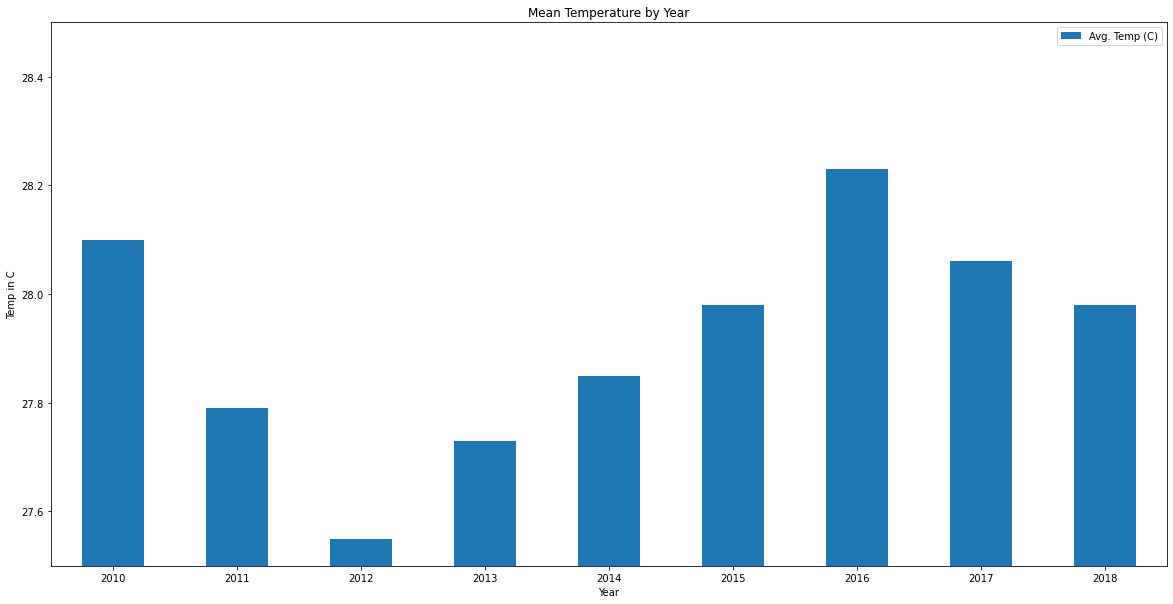

In [35]:
joined_temp_mean_plot = joined_temp_mean.plot(kind='bar', figsize = (20,10), title='Mean Temperature by Year', ylim=(27.5, 28.5),
                                             rot=0, ylabel='Temp in C')

In [36]:
food_importance_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3',
                            'Resources', 'food_import_value_df.csv')
food_importance_df = pd.read_csv(food_importance_path, index_col=['Area', 'Year'])
food_importance_df = food_importance_df.rename(columns={'Value' : 'Food Import Value (%)'})
food_importance_df

Food Import Value (%)
Area          Year                            
Cameroon      2009-2011                   20.0
              2010-2012                   20.0
              2011-2013                   24.0
              2012-2014                   23.0
              2013-2015                   23.0
              2014-2016                   21.0
              2015-2017                   25.0
              2016-2018                   25.0
              2017-2019                   25.0
Côte d'Ivoire 2009-2011                   11.0
              2010-2012                   13.0
              2011-2013                   13.0
              2012-2014                   12.0
              2013-2015                   10.0
              2014-2016                   11.0
              2015-2017                   11.0
              2016-2018                   12.0
              2017-2019                   12.0
Ecuador       2009-2011                    7.0
              2010-2012                    6.0
              2011-2013                    6.0
              2012-2014                    5.0
              2013-2015                    6.0
              2014-2016                    6.0
              2015-2017                    6.0
              2016-2018                    6.0
              2017-2019                    6.0
Ghana         2009-2011                   15.0
              2010-2012                   13.0
              2011-2013                   13.0
              2012-2014                   13.0
              2013-2015                   16.0
              2014-2016                   16.0
              2015-2017                   15.0
              2016-2018                   13.0
              2017-2019                   12.0
Nigeria       2009-2011                    7.0
              2010-2012                    6.0
              2011-2013                    7.0
              2012-2014                    7.0
              2013-2015                    9.0
              2014-2016                   10.0
              2015-2017                   14.0
              2016-2018                   13.0
              2017-2019                   11.0

In [37]:
gdp_df_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3',
                   'Resources', 'gdp_df.csv')
gdp_df = pd.read_csv(gdp_df_path, index_col=['Area', 'Year'])
gdp_df = gdp_df.rename(columns={'Value' : 'GDP (I$)'})
gdp_df

GDP (I$)
Area          Year          
Cameroon      2010    3086.2
              2011    3126.8
              2012    3180.8
              2013    3262.8
              2014    3362.7
              2015    3458.7
              2016    3524.4
              2017    3554.5
              2018    3603.5
              2019    3642.3
              2020    3576.3
Côte d'Ivoire 2010    3660.9
              2011    3417.8
              2012    3692.6
              2013    3922.5
              2014    4161.9
              2015    4417.2
              2016    4615.7
              2017    4830.8
              2018    5033.5
              2019    5212.6
              2020    5174.1
Ecuador       2010   10341.0
              2011   10984.3
              2012   11431.4
              2013   11818.6
              2014   12078.5
              2015   11896.4
              2016   11551.6
              2017   11617.9
              2018   11561.7
              2019   11370.6
              2020   10329.2
Ghana         2010    3729.5
              2011    4151.5
              2012    4431.0
              2013    4645.8
              2014    4670.2
              2015    4662.3
              2016    4712.5
              2017    4983.7
              2018    5177.9
              2019    5396.9
              2020    5305.0
Nigeria       2010    4932.3
              2011    5056.9
              2012    5131.4
              2013    5329.1
              2014    5516.4
              2015    5514.8
              2016    5284.9
              2017    5190.4
              2018    5155.1
              2019    5135.5
              2020    4916.7

In [38]:
gdp_df_mean = pd.read_csv(gdp_df_path, infer_datetime_format=True, parse_dates=True)
gdp_df_mean = gdp_df_mean.set_index(['Year'])
gdp_df_mean = gdp_df_mean.drop(columns=('Area'))
gdp_df_mean = gdp_df_mean.groupby(by=['Year'], dropna=False).mean()
gdp_df_mean = gdp_df_mean.rename(columns={'Value' : 'GDP (I$)'})
gdp_df_mean

,GDP (I$)
Year,
2010,5149.98
2011,5347.46
2012,5573.44
2013,5795.76
2014,5957.94
2015,5989.88
2016,5937.82
2017,6035.46
2018,6106.34


In [39]:
food_import_mean = pd.read_csv(food_importance_path, infer_datetime_format=True, parse_dates=True)
food_import_mean = food_import_mean.set_index(['Year'])
food_import_mean = food_import_mean.drop(columns=('Area'))
food_import_mean = food_import_mean.groupby(by=['Year'], dropna=False).mean()
food_import_mean = food_import_mean.rename(columns={'Value' : 'Food Import Value (%)'},
                                          index={'2009-2011' : '2010', '2010-2012' : '2011',
                                                '2011-2013' : '2012', '2012-2014' : '2013',
                                                '2013-2015' : '2014', '2014-2016' : '2015',
                                                '2015-2017' : '2016', '2016-2018' : '2017',
                                                '2017-2019' : '2018'})
food_import_mean

,Food Import Value (%)
Year,
2010,12.0
2011,11.6
2012,12.6
2013,12.0
2014,12.8
2015,12.8
2016,14.2
2017,13.8
2018,13.2


In [40]:
joined_temp_prod_econ = pd.concat([joined_temp_production_df, gdp_df_mean,
                                  ],
                                  axis='columns', join='inner')
joined_temp_prod_econ

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha),Avg. Temp (C),GDP (I$)
Year,,,,,
2010,545752.0,1236288.2,4081.6,28.10,5149.98
2011,613287.6,1319243.4,4469.2,27.79,5347.46
2012,630098.8,1334580.6,4272.2,27.55,5573.44
2013,610980.8,1328779.0,4156.4,27.73,5795.76
2014,646788.8,1399964.0,4250.6,27.85,5957.94
2015,682383.4,1479694.0,4272.2,27.98,5989.88
2016,652293.8,1375332.6,4211.4,28.23,5937.82
2017,751691.0,1624987.8,4311.2,28.06,6035.46
2018,757511.4,1679538.6,4346.2,27.98,6106.34


In [41]:
joined_corr = joined_temp_prod_econ.corr()
joined_corr

,Crops (tonnes),Area Harvested (ha),Yield (hg/ha),Avg. Temp (C),GDP (I$)
Crops (tonnes),1.000000,0.980336,0.485710,0.214610,0.842077
Area Harvested (ha),0.980336,1.000000,0.426079,0.260180,0.793830
Yield (hg/ha),0.485710,0.426079,1.000000,-0.244056,0.176499
Avg. Temp (C),0.214610,0.260180,-0.244056,1.000000,0.215011
GDP (I$),0.842077,0.793830,0.176499,0.215011,1.000000


<AxesSubplot:>

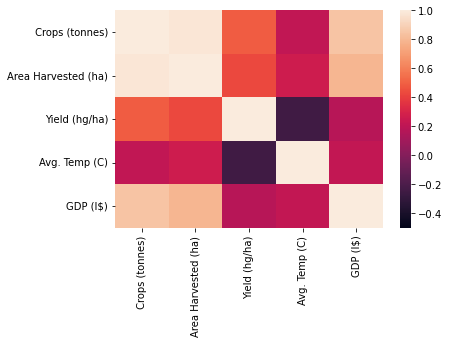

In [42]:
final_corr_heatmap = sns.heatmap(joined_corr, vmin=-0.5, vmax=1)
final_corr_heatmap

<AxesSubplot:title={'center':'Value of food imports in total merchandise exports (%)'}, xlabel='Year', ylabel='%'>

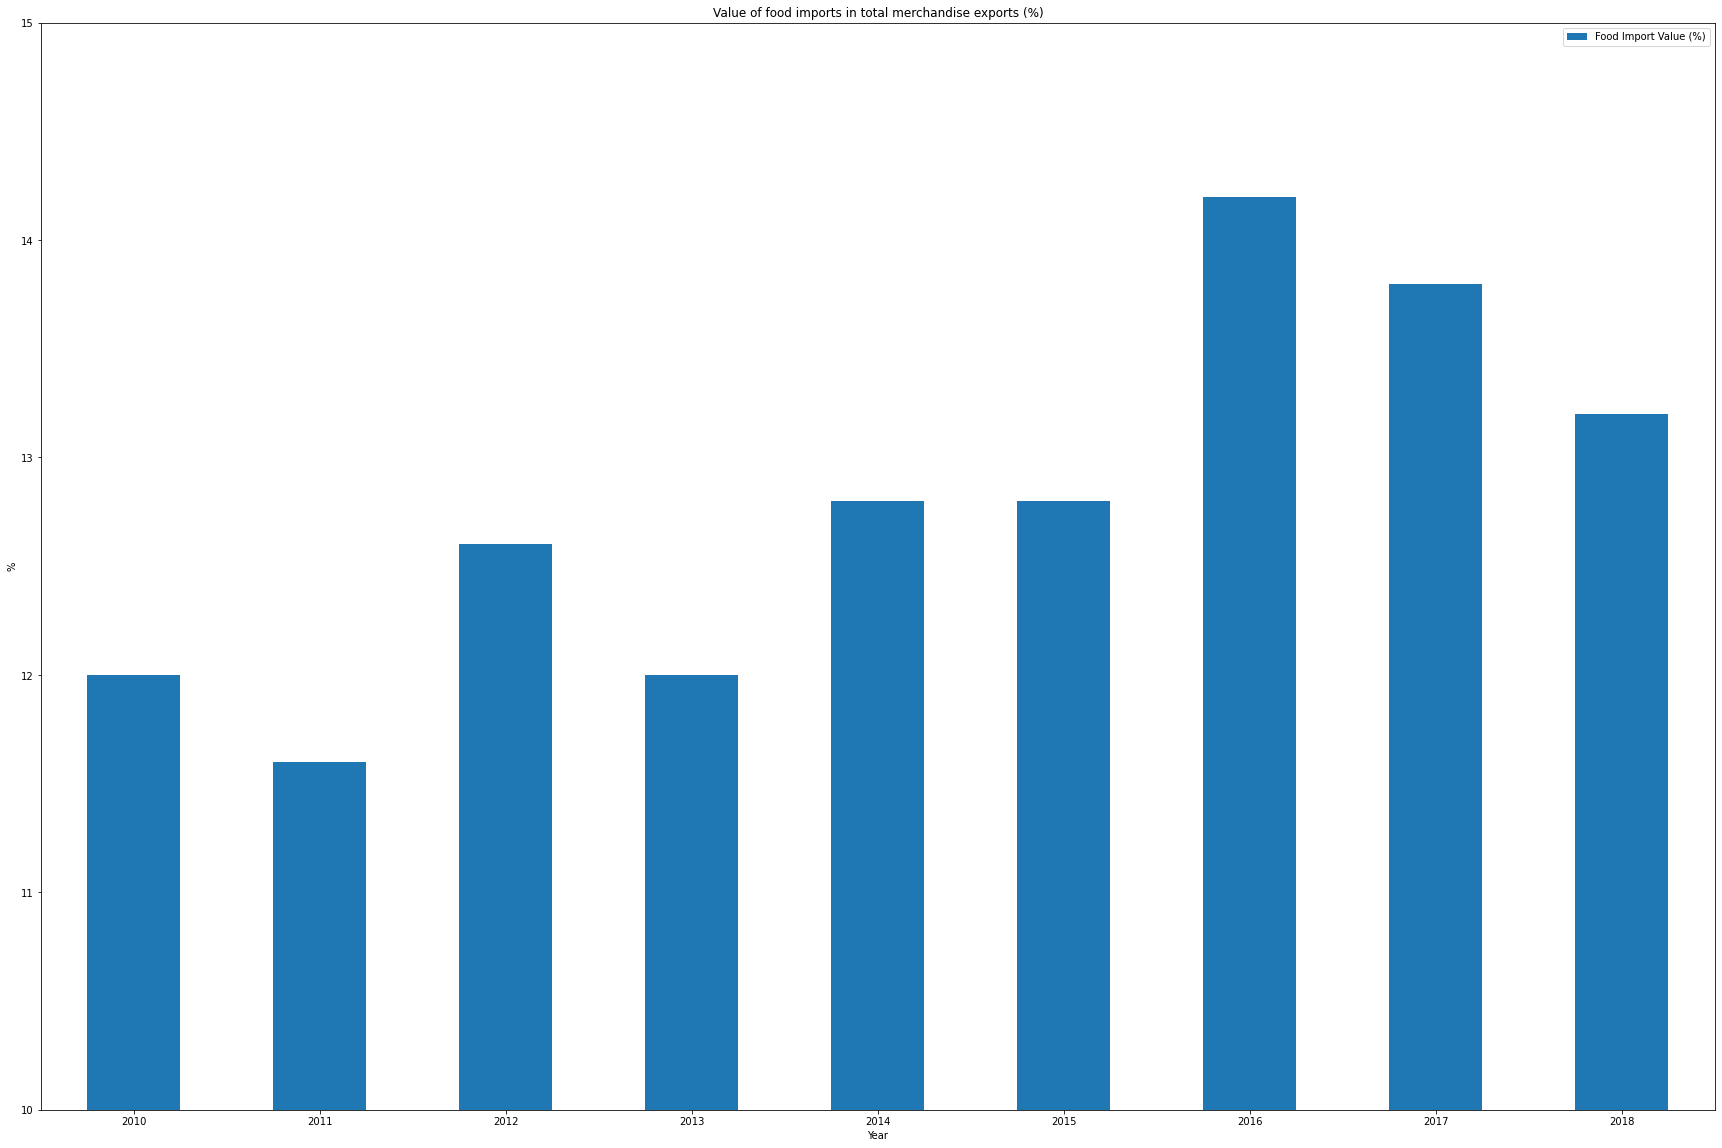

In [43]:
food_import_mean.plot(kind='bar', figsize=(30,20), rot=0, ylim=(10,15), ylabel='%',
                     title='Value of food imports in total merchandise exports (%)')

<AxesSubplot:title={'center':'Gross domestic product per capita, PPP, dissemination'}, xlabel='Year', ylabel='I$'>

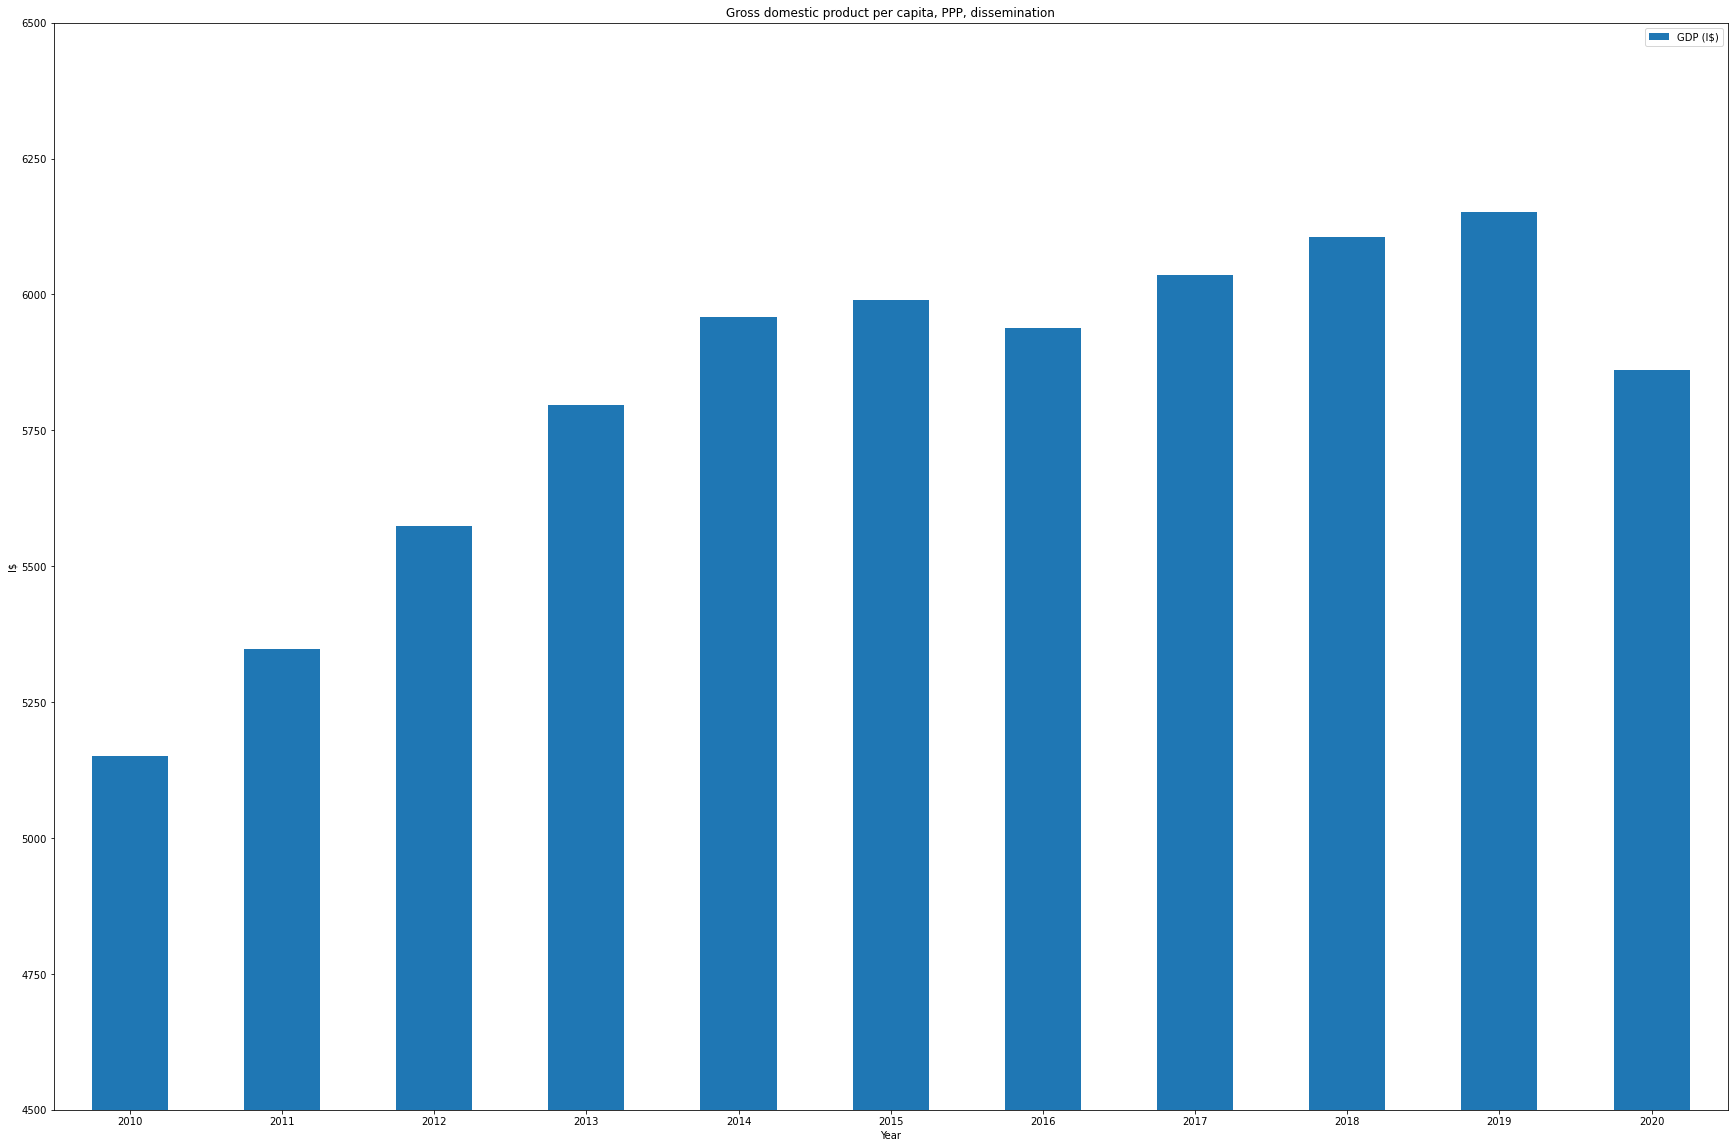

In [50]:
gdp_df_mean.plot(kind='bar', figsize=(30,20), rot=0, ylim=(4500, 6500), ylabel='I$',
                     title='Gross domestic product per capita, PPP, dissemination')